## L96モデルと真値・観測値の設定
$$
\frac{dX_{j}}{dt} = (X_{j+1} - X_{j-2})X_{j-1} - X_{j} + F, 
j=0,...,N-1
$$
周期境界条件、N=40,F=8.0とする

In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def L96(Xa,F):
    N=len(Xa)
    F_=np.linspace(1,N,N)
    X_=np.r_[Xa,Xa] #X[-1]=X[J-1],X[0]=X[J],X[J+1]=X[1]
    #print(X_)
    
    for j in np.arange(N):
        F_[j]=(X_[j+1]-X_[j-2])*X_[j-1]-X_[j]+F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    K1=np.linspace(1,N,N)
    K2=np.linspace(1,N,N)
    K3=np.linspace(1,N,N)
    K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    #print(F_)
    for k in np.arange(N):
        K1[k] = h*F_[k]

    X2=Xa+K1/2
    F_ = L96(X2,F)
    #print(F_)
    for k in np.arange(N):
        K2[k]=h*F_[k]
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    #print(F_)
    for k in np.arange(N):
        K3[k]=h*F_[k]
    
    X4=Xa+K3
    F_ = L96(X4,F)
    #print(F_)
    for k in np.arange(N):
        K4[k]=h*F_[k]
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

#2次のルンゲクッタ
def Rungekutta2(Xa,h,F):
    N=len(Xa)
    K1=np.linspace(1,N,N)
    K2=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    #print(F_)
    for k in np.arange(N):
        K1[k] = h*F_[k]

    X2=Xa+K1
    F_ = L96(X2,F)
    #print(F_)
    for k in np.arange(N):
        K2[k]=h*F_[k]
    K2 -= K1
    
    Xb = Xa +K2/2
    
    return Xb

def makedata(m,F,df):
    h=0.05
    t=0.0
    N=40
    
    Xa = np.full((N),F)
    Xa[19] = F+df
    
    #for i in range(N):
    #    Xa[i] += random.random()*0.1
    #Xa[19] += df
    
    X = []
    time = []
    
    #X.append(Xa[19])
    #time.append(t)
    
    for i in np.arange(1,m+1):
        Xb = Rungekutta4(Xa,h,F)
        Xa=Xb
        t=t+h
     
        if 1000 <= i <= 2000:
            X.append(Xa[19])
            time.append(t)
    
    return X,time


0.3196803196803197 1.5979232837991495
0.15811520698438755 1.1484628102530163


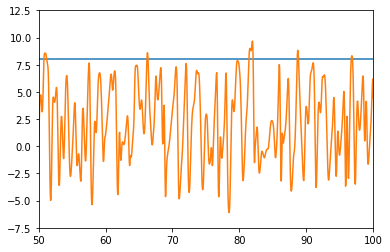

In [32]:
(X1,t) = makedata(3000,8.0,0.0)
(X2,t) = makedata(3000,8.0,0.008)
N = len(X1)
X0 = np.array(X1[0:40])
Xbar = sum(X0)/N
sigma = np.sqrt(sum(X0**2 - Xbar**2)/N)
print(Xbar,sigma)
X0 = np.array(X2[0:40])
Xbar = sum(X0)/N
sigma = np.sqrt(sum(X0**2 - Xbar**2)/N)
print(Xbar,sigma)

plt.figure()
plt.xlim(0.05*1000,0.05*2000)
plt.ylim(-7.5,12.5)
plt.plot(t,X1)
plt.plot(t,X2)
plt.show()

In [4]:
def contour(m,F,df):
    h=0.05
    t=0.0
    N=40
    
    Xa = np.full((N),F)
    #Xa[19] = F+df
    
    for i in range(N):
        Xa[i] += random.random()*0.01
    Xa[19] += df
    
    X = []
    time = []
    
    X.append(Xa)
    time.append(t)
    
    for i in np.arange(m):
        Xb = Rungekutta4(Xa,h,F)
        Xa=Xb
        t=t+h
     
        X.append(Xa)
        time.append(t)
    
    return X,time


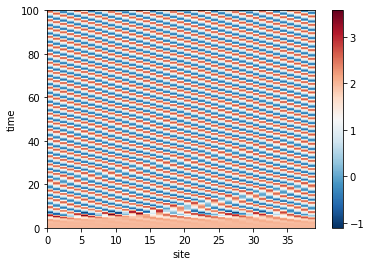

In [5]:
(X,t) = contour(2000,2.0,0.0)
xs = np.arange(40)
X = np.array(X).reshape(len(t),len(xs))
plt.pcolor(xs,t,X,cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.savefig("contour4.8.jpg")
plt.show()

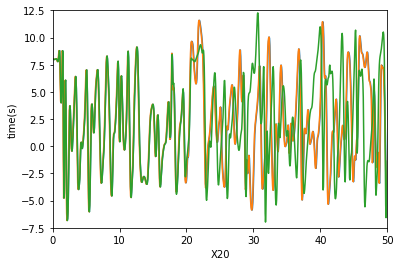

In [40]:
#澤崎さん
# coding: utf-8

# In[1]:


import numpy as np
import matplotlib.pyplot as plt


# In[2]:


f = 8.0
def dx(x):
    v  = (np.roll(x, -1) - np.roll(x, 2)) * np.roll(x, 1) -  x + f
    return v


# In[3]:


x = np.full((40), f)
x[19] = f + 0.008
dt = 0.05
li = []

x19 = []
time = []
x19.append(x[19])
time.append(0.0)
for i in range(1000):
    #2order -> 4oder
    k1 = dx(x)*dt
    l1 = x + k1/2
    k2 = dx(l1)*dt
    l2 = x + k2/2
    k3 = dx(l2)*dt
    l3 = x + k3
    k4 = dx(l3)*dt
    nx = x + (k1 + k2*2 + k3*2 + k4)/6
    li.append(nx)
    x = nx

    x19.append(x[19])
    time.append(dt*(i+1))


# In[4]:

"""
li = np.array(li)
#plt.figure(figsize=(10,8))
plt.plot(li[:,0])
"""

plt.xlim(0,50)
plt.ylim(-7.5,12.5)

plt.plot(time,x19)
"""
#(X,t) = contour(1000,8.0,0.008)
xs = np.arange(40)
t = np.array(time)
X = np.array(x19).reshape(len(t),len(xs))
plt.pcolor(xs,t,X,cmap='RdBu_r')
plt.colorbar()
plt.xlabel('site')
plt.ylabel('time')
plt.show()
"""



#大塚さん
# 4次のルンゲ・クッタ(Runge-Kutta)法を解くプログラム

import numpy as np
import matplotlib.pyplot as plt

#Nは連立微分方程式の数
N = 40
#dtは微小時間。小さいほど正確になるが時間が掛かる。
dt = 0.05
#finNは解析を行う回数
finN = 1000

F = 8.0
X = []
for i in range(N):
    if i != 19:
        X.append(F)
    else:
        X.append(F+0.008)
#"""

#各1階部分方程式を入力するところ。
def func(temp_X, N, i, time):   #X：引数、N：要素数、i：番号で0が最初でN-1が最後、time：時刻
    if 0 <= i < N-1:
        return (temp_X[i+1] - temp_X[i-2])*temp_X[i-1] - temp_X[i] + F
    elif i == N-1:
        return (temp_X[0] - temp_X[i-2])*temp_X[i-1] - temp_X[i] + F

t = 0
count = 0
time_array = []
time_array.append(0.0)
X20_array = []
X20_array.append(X[19])
for j in range(finN):
    k1 = []
    k2 = []
    k3 = []
    k4 = []
    temp1_X = []
    temp2_X = []
    temp3_X = []
    for i in range(N):
        k1.append(func(X, N, i, t)*dt)
    for i in range(N):
        temp1_X.append(X[i]+k1[i]/2.0)
    for i in range(N):
        k2.append(func(temp1_X, N, i, t+dt/2.0)*dt)
    for i in range(N):
        temp2_X.append(X[i]+k2[i]/2.0)
    for i in range(N):
        k3.append(func(temp2_X, N, i, t+dt/2.0)*dt)
    for i in range(N):
        temp3_X.append(X[i]+k3[i])
    for i in range(N):
        k4.append(func(temp3_X, N, i, t+dt)*dt)
    for i in range(N):
        X[i] += (k1[i] + k2[i]*2.0 + k3[i]*2.0 + k4[i])/6.0
    t = j*dt

    time_array.append(t)
    X20_array.append(X[19])

#plt.figure(figsize=(10,8))

plt.xlabel("X20")
plt.ylabel("time(s)")
plt.xlim(0,50)
plt.ylim(-7.5,12.5)
plt.plot(time_array, X20_array)
#plt.show()

#中下
(X1,t) = makedata(1000,8.0,0.008)
#(X2,t) = makedata(1000,8.0,0.0081)
#plt.figure()
#plt.xlim(0,50)
#plt.ylim(-7.5,12.5)
plt.plot(t,X1)
#plt.plot(t,X2)
#plt.show()

plt.show()




### doubling timeの検証

In [4]:
def L96(Xa,F):
    N=len(Xa)
    F_=np.linspace(1,N,N)
    X_=np.r_[Xa,Xa] #X[-1]=X[J-1],X[0]=X[J],X[J+1]=X[1]
    #print(X_)
    
    for j in np.arange(N):
        F_[j]=(X_[j+1]-X_[j-2])*X_[j-1]-X_[j]+F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    N=len(Xa)
    K1=np.linspace(1,N,N)
    K2=np.linspace(1,N,N)
    K3=np.linspace(1,N,N)
    K4=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    #print(F_)
    for k in np.arange(N):
        K1[k] = h*F_[k]

    X2=Xa+K1/2
    F_ = L96(X2,F)
    #print(F_)
    for k in np.arange(N):
        K2[k]=h*F_[k]
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    #print(F_)
    for k in np.arange(N):
        K3[k]=h*F_[k]
    
    X4=Xa+K3
    F_ = L96(X4,F)
    #print(F_)
    for k in np.arange(N):
        K4[k]=h*F_[k]
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

#2次のルンゲクッタ
def Rungekutta2(Xa,h,F):
    N=len(Xa)
    K1=np.linspace(1,N,N)
    K2=np.linspace(1,N,N)
    
    F_ = L96(Xa,F)
    #print(F_)
    for k in np.arange(N):
        K1[k] = h*F_[k]

    X2=Xa+K1
    F_ = L96(X2,F)
    #print(F_)
    for k in np.arange(N):
        K2[k]=h*F_[k]
    K2 -= K1
    
    Xb = Xa +K2/2
    
    return Xb

def makedata2(m,i,a):
    h=0.05
    t=0.0
    N=40
    F=8.0
    
    Xa = np.full((N),F)
    Xa[19] = F+0.008
    
    for j in range(1000+i*10): #offset transition
        Xb = Rungekutta4(Xa,h,F)
        Xa = Xb
    
    X = []
    time = []
    
    if a > 1:
        Xa[19] += 0.0001
        
    X.append(Xa)
    time.append(t)
    
    for j in range(m-1):
        Xb = Rungekutta4(Xa,h,F)
        Xa=Xb
        t=t+h
     
        X.append(Xa)
        time.append(t)
        
    return X,time


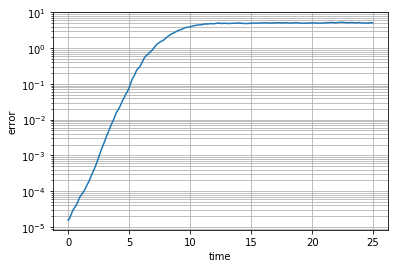

In [5]:
error=np.zeros(500)
for i in range(50):
    #df = 0.0001*(i+1)
    (X1,t) = makedata2(500,i,0)
    (X2,t) = makedata2(500,i,2)
    N = len(t)
    X1 = np.array(X1).reshape(N,40)
    X2 = np.array(X2).reshape(N,40)
    err = np.zeros(N)
    for j in range(N):
        Xdif = X1[j,:] - X2[j,:]
        err[j] = np.sqrt(sum(Xdif**2)/40)
    error += err
error = error/50

plt.yscale("log")
plt.grid(which="both")
plt.plot(t,error)
plt.xlabel('time')
plt.ylabel('error')
#plt.savefig("error.jpg")
plt.show()

Lyapunov exponent = 1.6559286445275079
doubletime = 0.418585174458241 units


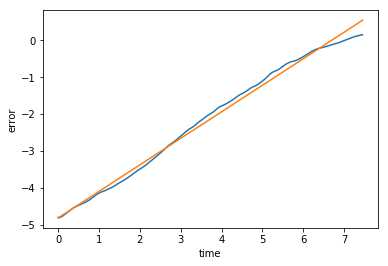

In [8]:
from scipy import optimize as opt

time =[]
y = []
for i in range(150):
    time.append(t[i])
    y.append(np.log10(error[i]))

plt.plot(np.array(time),np.array(y))
plt.xlabel("time")
plt.ylabel("error")

def fit_func(x,a,b):
    return a*x+b

res = opt.curve_fit(fit_func,time,y)

a = res[0][0]
b = res[0][1]
print("Lyapunov exponent = %s" % (a*np.log(10)))
print("doubletime = %s units" % (np.log10(2)/a))

y2 = []
for x in time:
    y2.append(a*x + b)


plt.plot(time,np.array(y2))
plt.savefig("linear.jpg")
plt.show()

### 真値の作成

In [3]:
import pandas as pd
import csv

def makecsv(m,F,N,df,fname):
    h=0.05
    t=0.0
    
    Xa = np.full((N),F)
    Xa[int(N/2)-1] += df
    
    X = []
    time = []
    
    for i in np.arange(1,m):
        Xb = Rungekutta4(Xa,h,F)
        Xa=Xb
        t=t+h
        if i > 1460:
            X.append(Xa)
            time.append(t)
        
    df=pd.DataFrame(X)
    df.to_csv(fname,index=False)
    
    dataset = pd.read_csv(fname)
    print(dataset)
    array = dataset.values
    #print(array)
    
    return array

In [4]:
data = makecsv(2921,8.0,40,0.008,"data2.csv")
data[1400]

             0         1         2         3         4         5         6  \
0    -4.577655 -2.752373  0.099049  0.677744  5.934551 -0.679750 -2.954209   
1    -3.492238 -2.382872 -0.132460  1.021116  5.995053 -1.253493 -2.160478   
2    -1.737512 -2.129497 -0.155935  1.296183  6.018508 -1.643000 -1.247249   
3     0.132688 -1.731283  0.028431  1.592421  5.997327 -1.819359 -0.291257   
4     1.660538 -1.145299  0.355962  1.971286  5.920252 -1.806988  0.611892   
...        ...       ...       ...       ...       ...       ...       ...   
1455  7.044616  0.469440 -5.168889 -0.656315 -3.488265  3.020449  4.738528   
1456  7.039963 -1.640432 -4.319040  0.390038 -2.956939  2.469977  5.113932   
1457  6.749252 -3.296762 -2.949851  0.788140 -2.242667  2.150081  5.431304   
1458  6.181585 -4.373165 -1.353875  0.941750 -1.565554  2.000728  5.716146   
1459  5.360107 -4.893537  0.179889  1.198872 -0.969396  1.998616  5.996799   

             7         8         9  ...        30        31    

array([-3.22903271,  6.65075264,  3.66413503, -4.44469144,  4.32161901,
        6.12645117,  1.57324848,  4.80720966,  7.92802367, -5.4202742 ,
        1.61474789,  2.07025834,  2.17331266,  3.89791745,  5.92925525,
       -0.09795262,  3.43533022,  8.62662516, -4.7365384 , -3.13439651,
        0.0713189 ,  3.9263475 ,  4.23282064,  4.80209868,  3.2329083 ,
       -2.60662364,  1.98282413,  3.20913656,  9.93093182,  2.69460049,
       -2.99975516,  5.3326887 , -0.26721773,  2.88595608,  5.53372248,
        0.56595342,  2.12943171,  6.12382315, -2.00587646, -3.48620856])

### 観測値の作成

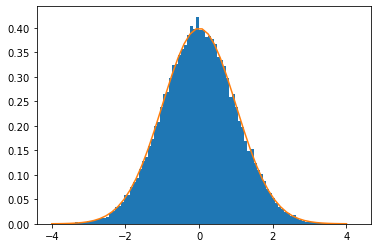

In [5]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import csv

dataset = pd.read_csv("data.csv")
data = dataset.values
data2 = np.empty(data.shape)
#data = makecsv(2921,8.0,0.008)
N = data.size
R = []
x = np.linspace(-40,40)
x = x * 0.1
y = np.exp(-x*x/2)/np.sqrt(2*np.pi)
for i in range(N):
    R.append(random.normalvariate(0.0,1.0))
plt.hist(R,bins=100,density=True)
plt.plot(x,y)
oberr = np.array(R).reshape(data.shape)
#for i in range(1460):
#data2 = np.sqrt(data**2) + oberr
data2 = data**3 + oberr
   
df=pd.DataFrame(data2)
df.to_csv("observation_data3.csv",index=False)
    

             0         1         2         3         4         5         6  \
0    -5.806078 -1.773928 -0.821937 -1.319859  7.037723 -0.235118 -3.736965   
1    -2.676840 -1.487953 -0.635243  1.924232  5.964818 -1.661722 -2.236273   
2    -2.579894 -1.632824  2.167579  1.649168  4.195420 -3.001193 -1.187929   
3     0.058275 -2.093588 -0.816943  3.213102  7.982517 -0.528431  0.239692   
4     1.019766 -1.184325  0.742466  0.169378  7.272150 -1.514060  1.189162   
...        ...       ...       ...       ...       ...       ...       ...   
1455  6.527402  2.407743 -6.533961 -0.412436 -4.536696  3.935780  2.721955   
1456  5.173152 -0.866314 -4.241460  0.519340 -3.227319  2.793156  5.604610   
1457  6.095820 -3.861032 -4.006794  0.708436 -2.087175  1.817924  4.787225   
1458  6.384782 -4.394748 -1.289661  1.075919 -1.331770  2.102122  4.390192   
1459  6.002210 -4.618433  0.919837  2.287867  0.426852  1.427496  4.992741   

             7         8         9  ...        30        31    

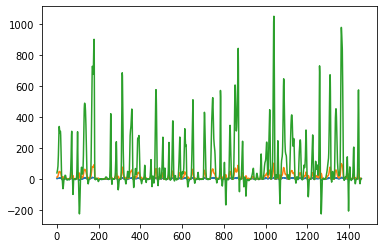

In [6]:
dataset = pd.read_csv("observation_data.csv")
print(dataset)
x = dataset.iloc[:,19]
X = x.values
plt.plot(X)
dataset = pd.read_csv("observation_data2.csv")
print(dataset)
x = dataset.iloc[:,19]
X = x.values
plt.plot(X)
dataset = pd.read_csv("observation_data3.csv")
print(dataset)
x = dataset.iloc[:,19]
X = x.values
plt.plot(X)
plt.show()

In [12]:
y = dataset.values
y = y.T
print(y[:,0])
y[:,0].size

[-6.60130291 -2.69261096  1.21521549  0.70002654  6.8557409  -0.70026563
 -2.12495728  0.59340297  4.88268984  0.08403021  2.14371899  5.05572874
  3.77114025 -5.66330822  3.1649779   2.09186306  4.04144513  5.76084707
 -1.81755386  4.31568382  5.44187268  3.60820507 -3.04211546 -5.05089355
  1.95425297  3.71247964  3.69972145  6.31281935 -3.81434705  1.45061579
 -0.90213683  5.55440298  7.79415711 -1.1292009   4.33703025  0.04253367
 -3.11156441  0.25680904 10.77135968 -0.20439828]


40